In [1]:
%matplotlib inline

from pathlib import Path
import json
import sys
sys.path.append("../../")

import anamic

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tifffile
from scipy import ndimage

data_dir = Path('/home/hadim/Drive/Data/Fake Microtubules/anamic')

../../anamic/transformations.py:1916: UserWarning: No module named 'anamic._transformations'
  warnings.warn(str(err))


In [33]:
fname

PosixPath('/home/hadim/Drive/Data/Fake Microtubules/anamic/taper_length_nm_0000/microtubule_0002.tif')

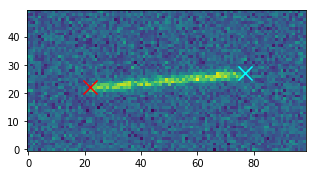

In [2]:
condition = "taper_length_nm_0000"
fnames = list((data_dir / condition).glob("*.tif"))

index = 0
fname = fnames[index]

# Open the image
im = tifffile.imread(str(fname))

# Load metadata
metadata = json.load(open(fname.with_suffix('.json')))

# Get microtubule tip coordinates
tip_start = np.array(metadata['tip_start'])
tip_end = np.array(metadata['tip_end'])

# Check the tips locations.
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(im, interpolation='none', origin=[0, 0], cmap='viridis')
ax.set_aspect('equal')
ax.scatter(tip_start[1], tip_start[0], color='red', s=200, marker="x")
ax.scatter(tip_end[1], tip_end[0], color='cyan', s=200, marker="x")

In [38]:
# Line profile parameters
# See `help(anamic.fitter.line_profile)`
# for details about the arguments.

profile_parameters = {}
profile_parameters['pixel_size'] = metadata['pixel_size']
profile_parameters['offset_start'] = 4000  # nm
profile_parameters['offset_end'] = 1500  # nm
profile_parameters['spacing'] = 0.1  # pixel
profile_parameters['line_thickness'] = 400  # nm
profile_parameters['line_thickness_spacing'] = 0.1  # pixel
profile_parameters['normalized_intensities'] = False

x_profile, y_profile, line = anamic.fitter.line_profile(im, tip_start, tip_end,
                                                        **profile_parameters)

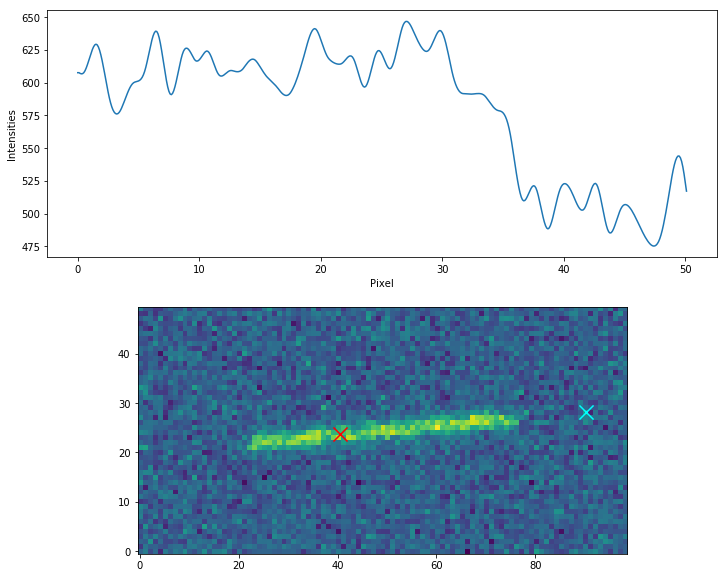

In [39]:
# Visualize the line profile
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12, 10))

ax1.plot(x_profile, y_profile)
ax1.set_xlabel("Pixel")
ax1.set_ylabel("Intensities")

ax2.imshow(im, interpolation='none', origin=[0, 0], cmap='viridis')
ax2.set_aspect('equal')
ax2.scatter(line[0, 1], line[0, 0], color='red', s=200, marker="x")
ax2.scatter(line[1, 1], line[1, 0], color='cyan', s=200, marker="x")